# Rate equations

\begin{align}
\frac{d[PA]}{dt} &= k_L ([PA]_{max} - [PA])- k_T [PA]([WA]_{max} - [WA]) - k_P [E][PA] \\
\frac{d[WA]}{dt} &= k_T [PA] ([WA]_{max} - [WA]) - k_N [E][WA]^2 - k_P [E][WA] \\
\frac{d[E]}{dt} &= k_N [E] [WA]^2 - k_C [E]
\end{align}

In [1]:
from numpy import array, zeros, arange, sqrt
def nucleation(load_rate = 10.0, transfer_rate = 1.0, 
               elongation_rate = 100.0, nucleation_rate = 1.0, capping_rate = 0.1, 
               ppr_max = 1.0, wh2_max = 1.0):
    wh2_eq = sqrt(capping_rate / nucleation_rate)
    # Set up quadratic.
    a = elongation_rate * (capping_rate + elongation_rate * wh2_eq)
    b = (load_rate + transfer_rate * (wh2_max - wh2_eq)) * (capping_rate + elongation_rate * wh2_eq)
    c = - load_rate * transfer_rate * (wh2_max - wh2_eq) * ppr_max
    if (b**2 - 4 * a * c < 0):
        print("Non-real solution")
    ends_eq = (-b + sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < 0.0:
        ends_eq = (-b - sqrt(b**2 - 4 * a * c)) / (2 * a)
    if ends_eq < 0.0:
        print("Network failed to assemble")
    ppr_eq = load_rate * ppr_max / (load_rate + elongation_rate * ends_eq + transfer_rate * (wh2_max - wh2_eq))
    return ppr_eq, wh2_eq, ends_eq

In [35]:
# Check monomer gating.
capping_rate_row = arange(0.1, 100.0, 1)
no_points = len(capping_rate_row)
ppr_eq_row = zeros(no_points)
wh2_eq_row = zeros(no_points)
ends_eq_row = zeros(no_points)

k_load = 10.0
k_transfer = 1.0
k_pol = 100.0
k_nuc = 1.0
pa_max = 60.0
wa_max = 10.0

for i in range(no_points):
    i_ppr_eq, i_wh2_eq, i_ends_eq = nucleation(load_rate = k_load,
                                               transfer_rate = k_transfer,
                                               elongation_rate = k_pol,
                                               nucleation_rate = k_nuc,
                                               ppr_max = pa_max,
                                               wh2_max = wa_max,
                                               capping_rate = capping_rate_row[i])
    ppr_eq_row[i] = i_ppr_eq
    wh2_eq_row[i] = i_wh2_eq
    ends_eq_row[i] = i_ends_eq

In [36]:
load_rate_eq_row = k_load * (pa_max - ppr_eq_row)
transfer_rate_eq_row = k_transfer * ppr_eq_row * (wa_max - wh2_eq_row)
elongation_rate_eq_row = k_pol * ends_eq_row * (ppr_eq_row + wh2_eq_row)
nucleation_rate_eq_row = k_nuc * ends_eq_row * wh2_eq_row**2
capping_rate_eq_row = capping_rate_row * ends_eq_row

Text(0.5, 0, '$k_C$ (/s)')

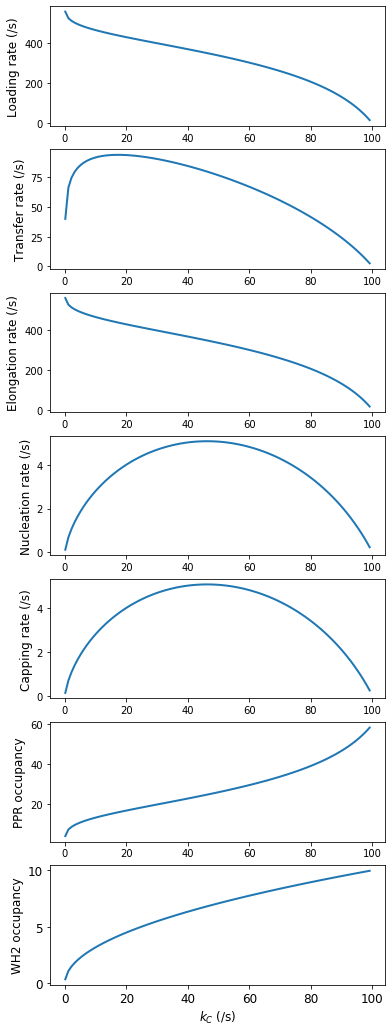

In [37]:
%matplotlib inline
from matplotlib.pyplot import subplots
fig1_handle, axes1_handle = subplots(nrows = 7, ncols = 1)
fig1_handle.set_figheight(18)
axes1_handle[0].plot(capping_rate_row, load_rate_eq_row, linewidth = 2, label = 'loading rate')
axes1_handle[1].plot(capping_rate_row, transfer_rate_eq_row, linewidth = 2, label = 'transfer rate')
axes1_handle[2].plot(capping_rate_row, elongation_rate_eq_row, linewidth = 2, label = 'elongation rate')
axes1_handle[3].plot(capping_rate_row, nucleation_rate_eq_row, linewidth = 2, label = 'nucleation rate')
axes1_handle[4].plot(capping_rate_row, capping_rate_eq_row, linewidth = 2, label = 'capping rate')
axes1_handle[5].plot(capping_rate_row, ppr_eq_row, linewidth = 2, label = 'PPR occupancy')
axes1_handle[6].plot(capping_rate_row, wh2_eq_row, linewidth = 2, label = 'WH2 occupancy')

axes1_handle[0].set_ylabel('Loading rate (/s)', fontsize = 12)
axes1_handle[1].set_ylabel('Transfer rate (/s)', fontsize = 12)
axes1_handle[2].set_ylabel('Elongation rate (/s)', fontsize = 12)
axes1_handle[3].set_ylabel('Nucleation rate (/s)', fontsize = 12)
axes1_handle[4].set_ylabel('Capping rate (/s)', fontsize = 12)
axes1_handle[5].set_ylabel('PPR occupancy', fontsize = 12)
axes1_handle[6].set_ylabel('WH2 occupancy', fontsize = 12)
axes1_handle[6].tick_params(labelsize = 12)
axes1_handle[6].set_xlabel(r'$k_C$ (/s)', fontsize = 12)